## **PARTIE 1: Prétraitement des données**

####

## **SOMMAIRE**

### Contexte

#### <span style="color: blue;"> **Réaliser une étude de faisabilité d'un moteur de classification automatique d’articles,** </span>

#### <span style="color: blue;">**en utilisant leur image et leur description**</span>.

### I- Requirements

- Importer les différentes librairies necessaire.
- Installation des bibliotheques necessaire.
- Charger la base de donnée totale.

###  II- Données textuelles

- Selection des données
- Structure des données(Nettoyage)
- Analyse Exploratoire des données textuelles(description)

**Commençons par travailler sur un document spécifique**

- Lower
- Tokenization
- Stopworks
- Première fonction de nettoyage

**Travail sur l'ensemble du corpus(tous les documents(description))**

- construction d'un corpus Brut

**Deuxième fonction de nettoyage**

- Méthode Tf_Idf
- Méthode embedding

#

#

## I- Requirements

###  1.1 Télechargement et option 

In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.1.0 requires markdown-it-py<3, but you have markdown-it-py 3.0.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   - -------------------------------------- 1.6/42.2 MB 9.4 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/42.2 MB 13.0 MB/s eta 0:00:03
   -------- ------------------------------- 8.9/42.2 MB 15.8 MB/s eta 0:00:03
   ------------ --------------------------- 12.8/42.2 MB 16.8 MB/s eta 0:00:02
   ------------- -------------------------- 14.4/42.2 MB 16.2 MB/s eta 0:00:02
   -------------- ------------------------- 15.5/42.2 MB 13.0 MB/s eta 0:00:03
   ----------------- ---------------------- 18.4/42.2 MB 13.2 MB/s eta 0:00:02
   --------------------- ------------------ 22.8/42.2 MB 14.3 MB/s eta 0:00:02
   --------------------------- ------------ 28.6/42.2 MB 15.9 MB/s eta 0:00:01
   ----------------------------- ---------- 30.9/42.2 MB 16.5 MB/s eta 0:00:01
   ----------------------------- ---------- 30.9/42.2 MB 16.5 MB/s

In [3]:
pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade transformers sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/10.1 MB 8.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.2/10.1 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.1 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transformers-4.47.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip uninstall transformers sentence-transformers -y

Found existing installation: transformers 4.47.1
Uninstalling transformers-4.47.1:
  Successfully uninstalled transformers-4.47.1
Found existing installation: sentence-transformers 3.3.1
Uninstalling sentence-transformers-3.3.1:
  Successfully uninstalled sentence-transformers-3.3.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.47.1-py3-none-any.whl.metadata (44 kB)
Using cached transformers-4.47.1-py3-none-any.whl (10.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade pip setuptools wheel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



### 1.2  Importer les différentes librairies necessaire

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import nltk,re
from transformers import BertTokenizer, BertModel
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer

In [10]:
# download asset
# """
nltk.download('punkt_tab')
# nltk.download('omw-1.4')
# nltk.download('wordnet')
# nltk.download('words')
# nltk.download()
# nltk.download('popular')
# nltk.download('all')
# """

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\521169\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 1.3 Charger la base de donnée totale

In [11]:
df_path = r"C:\Users\521169\Documents\Openclassrooms\Projet 6\Jeu de donnée\Dataset+projet+prétraitement+textes+images (1)\Flipkart\flipkart_com-ecommerce_sample_1050.csv"
data = pd.read_csv(df_path)
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


##  II- Analyse exploratoire des données textuelles

### 2.1 Selection des données

- **Extraction données de descriptions et images**

In [12]:
data_image_text = data[["image","description"]]
data_image_text.head(5)

,image,description
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...


### 2.2 Structure

In [13]:
data_image_text.shape

(1050, 2)

In [14]:
data_image_text.dtypes

image          object
description    object
dtype: object

In [15]:
data_image_text.describe()

,image,description
count,1050,1050
unique,1050,1050
top,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
freq,1,1


In [16]:
data_image_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        1050 non-null   object
 1   description  1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


In [17]:
data_image_text.nunique()

image          1050
description    1050
dtype: int64

- **Duplicated**

In [18]:
data_image_text.duplicated(subset = "description").sum()

0

**On constate que les documents(description) ne sont pas dupliquer de même que les images**

- **Valeurs manquantes**

In [19]:
data_image_text.isnull().sum()

image          0
description    0
dtype: int64

<Axes: >

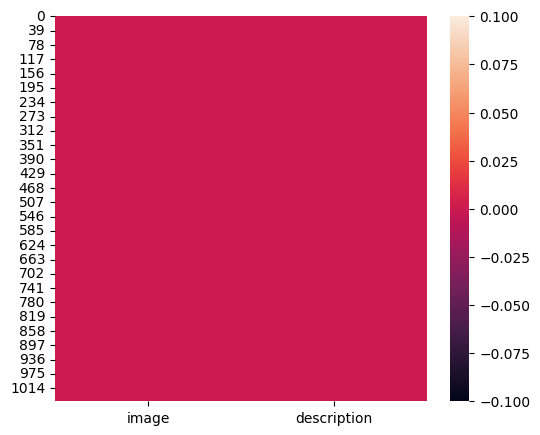

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(data_image_text.isnull())

- **Select columns description**

In [21]:
data_description = data[['description']]
data_description

,description
0,Key Features of Elegance Polyester Multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...
2,Key Features of Eurospa Cotton Terry Face Towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Key Features of Jaipur Print Cotton Floral Kin...
...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [22]:
df_description = data[['description']]

###

###  2.3 Analyse Exploratoire des données textuelles(description)

- **Lenght de chaque document**

In [23]:
lenght = data_description.description.apply(lambda i : len(i))
lenght

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64

In [24]:
lenght.describe()

count    1050.000000
mean      473.820952
std       457.910422
min       109.000000
25%       192.000000
50%       278.000000
75%       588.250000
max      3490.000000
Name: description, dtype: float64

<Axes: ylabel='description'>

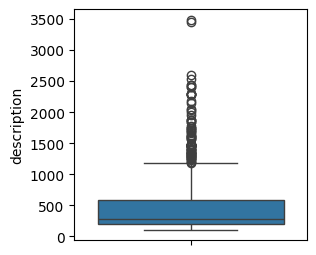

In [25]:
texte_description = data_description.description.str.len()
plt.figure(figsize=(3,3))
sns.boxplot(texte_description)

 - On conclut que la grande partie des **documents** contient entre **150 et 600 caractères**

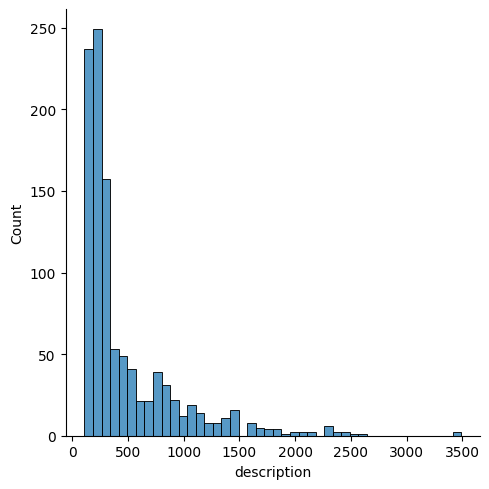

In [26]:
sns.displot(texte_description)

- La plupart des **produits** possèdes une description comprise entre **150 et 400 caractères**.

In [27]:
data_description = data_description.copy()
data_description["description_len"] = texte_description
data_description.head()

,description,description_len
0,Key Features of Elegance Polyester Multicolor ...,1420
1,Specifications of Sathiyas Cotton Bath Towel (...,444
2,Key Features of Eurospa Cotton Terry Face Towe...,1258
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,858
4,Key Features of Jaipur Print Cotton Floral Kin...,1197


In [28]:
data_description.sort_values('description_len').head(10)

,description,description_len
877,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,109
890,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,109
1030,Specifications of OMRD RD6697 Hot and cold Pac...,111
651,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,112
892,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,112
599,Next Steps Baby Girl's Layered Dress\r\n ...,112
1005,Specifications of Milani Runway shadow Wet/Dry...,113
678,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,114
874,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,114
884,Buy Amber Cotton Set of Towels at Rs. 239 at F...,114


### 3. Commençons par travailler sur un document spécifique

In [29]:
# Selection d'un document aléatoirement 
doc_random = data_description.description.sample(1)
doc_random = doc_random.values[0]
doc_random

"Key Features of CoffeeBean Regular Fit Baby Girl's Pink Trousers Occasion: Casual Suitable For:Western Wear Color: Pink Fit: Regular Fit Closure:Button Fabric:Cotton,CoffeeBean Regular Fit Baby Girl's Pink Trousers Price: Rs. 599 Kids Girls Printed Trouser with curved pocket at front side, it is very good in quality your baby girl will look smart and cute in this trouser.,Specifications of CoffeeBean Regular Fit Baby Girl's Pink Trousers General Details Pattern Floral Print Occasion Casual Ideal For Baby Girl's Alteration Required No Color Pink Trouser Details Closure Button Number of Contents in Sales Package Pack of 1 Fabric Cotton Type Chinos Fit Regular Fit Belt Loops Yes Fly Zipper In the Box 1 Trouser Additional Details Style Code 240KGT_PRINTED Fabric Care Machine Wash in Lukewarm Water"

### 3.1 Lower 

In [30]:
# Mettre tout la phrase en miniscule
doc_random = doc_random.lower()
doc_random
# replace() # pour enlever les pontuations

"key features of coffeebean regular fit baby girl's pink trousers occasion: casual suitable for:western wear color: pink fit: regular fit closure:button fabric:cotton,coffeebean regular fit baby girl's pink trousers price: rs. 599 kids girls printed trouser with curved pocket at front side, it is very good in quality your baby girl will look smart and cute in this trouser.,specifications of coffeebean regular fit baby girl's pink trousers general details pattern floral print occasion casual ideal for baby girl's alteration required no color pink trouser details closure button number of contents in sales package pack of 1 fabric cotton type chinos fit regular fit belt loops yes fly zipper in the box 1 trouser additional details style code 240kgt_printed fabric care machine wash in lukewarm water"

###  3.2 Tokenization

In [31]:
# tokenization 
tokens = word_tokenize(doc_random)
tokens[:30]

['key',
 'features',
 'of',
 'coffeebean',
 'regular',
 'fit',
 'baby',
 'girl',
 "'s",
 'pink',
 'trousers',
 'occasion',
 ':',
 'casual',
 'suitable',
 'for',
 ':',
 'western',
 'wear',
 'color',
 ':',
 'pink',
 'fit',
 ':',
 'regular',
 'fit',
 'closure',
 ':',
 'button',
 'fabric']

In [32]:
len(tokens)

144

In [33]:
len(set(tokens)) # longueur des tokens unique sans doublons

86

In [34]:
def display_tokens_info(tokens):
    """ display info about corpus """
    print(f" nb tokens {len(tokens)} nb tokens unique {len(set(tokens))} ")
    print(tokens[:20])

In [35]:
# another tokenize
tokens = wordpunct_tokenize(doc_random)
display_tokens_info(tokens)

 nb tokens 148 nb tokens unique 87 
['key', 'features', 'of', 'coffeebean', 'regular', 'fit', 'baby', 'girl', "'", 's', 'pink', 'trousers', 'occasion', ':', 'casual', 'suitable', 'for', ':', 'western', 'wear']


### 3.3 Stopworks 

In [36]:
# package contenant les stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'when', "shan't", 'then', 'am', 'yours', 'here', 'of', 't', 'our', "couldn't", 'you', 'those', 'needn', 'to', 'weren', 're', 'from', 'was', 'couldn', 'but', 'haven', 'doing', 'did', "you'll", 'll', 'now', 'until', 'not', 'm', 'ours', 'about', 'below', 'all', 'before', "you've", 'these', 'a', 'above', 'her', 'hadn', "hadn't", 'how', 'it', 'had', 'between', 'after', 'were', 'ourselves', 'mightn', 'there', 'the', 'doesn', 'by', 'where', 'each', 'won', 'his', 'aren', 'him', "mustn't", 'i', 'at', 'my', 'ain', 'other', 'can', 'any', 'yourself', 'both', 'because', 'is', 'herself', 'have', 'whom', 'such', 'shan', 'being', 'what', 'she', 'for', "aren't", 'yourselves', 'further', 'own', 'only', 'should', 'off', 'under', "mightn't", 'hers', 'been', 'an', 'against', 'that', 'this', "shouldn't", "won't", 'be', 'in', 'hasn', "doesn't", 'myself', 'or', 'again', 'its', 'why', 'than', 'and', "didn't", 'wasn', "wouldn't", 'will', 'wouldn', 'he', 'out', 'himself', 'does', 'nor', 'just', "it's", 'into', 

In [37]:
tokens =[w for w in tokens if w not in stopwords]
display_tokens_info(tokens)

 nb tokens 122 nb tokens unique 72 
['key', 'features', 'coffeebean', 'regular', 'fit', 'baby', 'girl', "'", 'pink', 'trousers', 'occasion', ':', 'casual', 'suitable', ':', 'western', 'wear', 'color', ':', 'pink']


In [38]:
tokenizer = RegexpTokenizer(r"\w+")
tokens =  tokenizer.tokenize(doc_random)   
display_tokens_info(tokens)

 nb tokens 133 nb tokens unique 82 
['key', 'features', 'of', 'coffeebean', 'regular', 'fit', 'baby', 'girl', 's', 'pink', 'trousers', 'occasion', 'casual', 'suitable', 'for', 'western', 'wear', 'color', 'pink', 'fit']


### 3.4 Première fonction de nettoyage

In [39]:
# fonction texte processing
def process_text_description_1(doc_random, rejoin = False):
           
# lower
        doc_random = doc_random.lower().strip()    
# tokenization
        tokenize = RegexpTokenizer(r"/w+")
        raw_token_list = tokenizer.tokenize(doc_random)
# stopword
        cleaned_token_list = [w for w in raw_token_list if w not in stopwords]
        
        if rejoin:
            return " ".join(cleaned_token_list)
        return cleaned_token_list

In [40]:
tokens = process_text_description_1(doc_random)
display_tokens_info(tokens)

 nb tokens 107 nb tokens unique 67 
['key', 'features', 'coffeebean', 'regular', 'fit', 'baby', 'girl', 'pink', 'trousers', 'occasion', 'casual', 'suitable', 'western', 'wear', 'color', 'pink', 'fit', 'regular', 'fit', 'closure']


####

## 4. Travail sur l'ensemble du corpus(tous les documents(description))

### 4.1 construction d'un corpus Brut

In [41]:
brut_corpus = "".join(data_description.description.values)
brut_corpus[:1000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [42]:
len(brut_corpus)

497512

In [43]:
corpus = process_text_description_1(brut_corpus)
display_tokens_info(corpus)

 nb tokens 61452 nb tokens unique 6165 
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm']


In [44]:
corpus_serie = pd.Series(corpus).value_counts()
corpus_serie

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [45]:
# réduisons les valeurs 
corpus_serie.head(20)

rs             911
products       631
free           618
delivery       567
cash           564
genuine        564
shipping       564
replacement    559
buy            543
day            540
cm             532
1              524
30             498
flipkart       475
guarantee      471
com            468
online         396
features       395
price          352
watch          329
dtype: int64

In [46]:
corpus_serie.tail(20)

552                   1
4509                  1
ws331c                1
architecture          1
5199                  1
socket                1
1150key               1
6428nc                1
585                   1
clothing              1
needybee              1
752dru                1
susceptible           1
linespecifications    1
esteem                1
drawerkey             1
680                   1
roundbuy              1
homeehub              1
dell                  1
dtype: int64

In [47]:
corpus_serie.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

### 4.2 Listes des rares tokens

In [48]:
# unique words
tokens_onetime = pd.Series(corpus).value_counts()
list_unique_word = tokens_onetime[tokens_onetime == 1]
list_unique_word[:20]

paraben        1
vinegar        1
glycol         1
oodles         1
ingredients    1
skip           1
bullshit       1
word           1
soapking       1
hop            1
arabicoudh     1
grass          1
students       1
979            1
leafs          1
vegetarian     1
length225      1
6645           1
quantities     1
sscp           1
dtype: int64

In [49]:
len(list_unique_word)

2114

In [50]:
list_unique_word = list(list_unique_word.index)
list_unique_word[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [51]:
# save new dataframe
dataset = pd.DataFrame({'word':list_unique_word })

#

### 5. Deuxième fonction de nettoyage 

#### 5.1 Méthode Tf_Idf 

In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
print(stopwords)

stemmer = PorterStemmer()
nltk_stopwords = set(stopwords.words('english'))

def clean_description(data_description):
    # Retrait des caractères non alphabétique et conversion en minuscule
    data_description = re.sub(r'[^a-zA-Z\s]', '', data_description, re.I|re.A).lower().strip()
    # Tokenization 
    tokens = data_description.split()
    # stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Stemming et lemmatization
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    return ' '.join(lemmatized_tokens)

<WordListCorpusReader in 'C:\\Users\\521169\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


In [53]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Instanciation des objets
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# Fonction nettoyage des descriptions
data_description = data[['description']].copy()
Brut = data[['description']].head()
data_description['cleaned_description'] = data_description['description'].apply(clean_description)
data_descript = data_description['cleaned_description']
data_description[['description','cleaned_description']]

,description,cleaned_description
0,Key Features of Elegance Polyester Multicolor ...,key featur eleg polyest multicolor abstract ey...
1,Specifications of Sathiyas Cotton Bath Towel (...,specif sathiya cotton bath towel bath towel re...
2,Key Features of Eurospa Cotton Terry Face Towe...,key featur eurospa cotton terri face towel set...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key featur santosh royal fashion cotton print ...
4,Key Features of Jaipur Print Cotton Floral Kin...,key featur jaipur print cotton floral king siz...
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,oren empow extra larg self adhes sticker pack ...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,wallmantra larg vinyl sticker sticker pack pri...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,buy uberlyf extra larg pigment polyvinyl film ...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,buy wallmantra medium vinyl sticker sticker r ...


- **Comparaisons "bag of word" et "Tf_Idf"**

In [54]:
# Initialisation des vecteurs
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Application du bag of word(bow) à la variable cleaned_description(methode 1)
bow_matrix = bow_vectorizer.fit_transform(data_description['cleaned_description'])

# Application du Tf_Idf à la variable cleaned_description(methode 2)
tfidf_matrix = tfidf_vectorizer.fit_transform(data_description['cleaned_description'])

# Application du Shape pour savoir la taille des variables
bow_shape = bow_matrix.shape
tfidf_shape = tfidf_matrix.shape

bow_shape, tfidf_shape

((1050, 4553), (1050, 4553))

In [55]:
# convertion en dataframe
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# feature matrices
bow_df.head(2)

,aa,aaa,aapno,aari,aarika,abil,abklgrngrngrn,abklplplpnk,abklplpnkpnk,abl,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
tfidf_df.head(2)

,aa,aaa,aapno,aari,aarika,abil,abklgrngrngrn,abklplplpnk,abklplpnkpnk,abl,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
print(bow_matrix)

  (0, 2144)	1
  (0, 1445)	2
  (0, 1264)	5
  (0, 3044)	6
  (0, 2618)	4
  (0, 15)	4
  (0, 1391)	6
  (0, 1144)	5
  (0, 957)	10
  (0, 1523)	1
  (0, 958)	1
  (0, 740)	3
  (0, 1844)	2
  (0, 2857)	3
  (0, 3111)	1
  (0, 1294)	1
  (0, 2331)	1
  (0, 2041)	1
  (0, 2384)	1
  (0, 1860)	1
  (0, 3201)	1
  (0, 1400)	1
  (0, 3883)	1
  (0, 3840)	1
  (0, 2501)	1
  :	:
  (1048, 3601)	1
  (1048, 612)	1
  (1048, 1029)	1
  (1048, 370)	1
  (1048, 2479)	2
  (1048, 3836)	4
  (1048, 4324)	2
  (1048, 4365)	2
  (1049, 3111)	1
  (1049, 3139)	1
  (1049, 541)	1
  (1049, 2792)	1
  (1049, 1654)	1
  (1049, 993)	1
  (1049, 3321)	1
  (1049, 1767)	1
  (1049, 1572)	1
  (1049, 3601)	1
  (1049, 612)	1
  (1049, 1029)	1
  (1049, 370)	1
  (1049, 2219)	2
  (1049, 3836)	2
  (1049, 4324)	2
  (1049, 4206)	2


- **Méthodes de réduction de dimension sur le texte encodé**

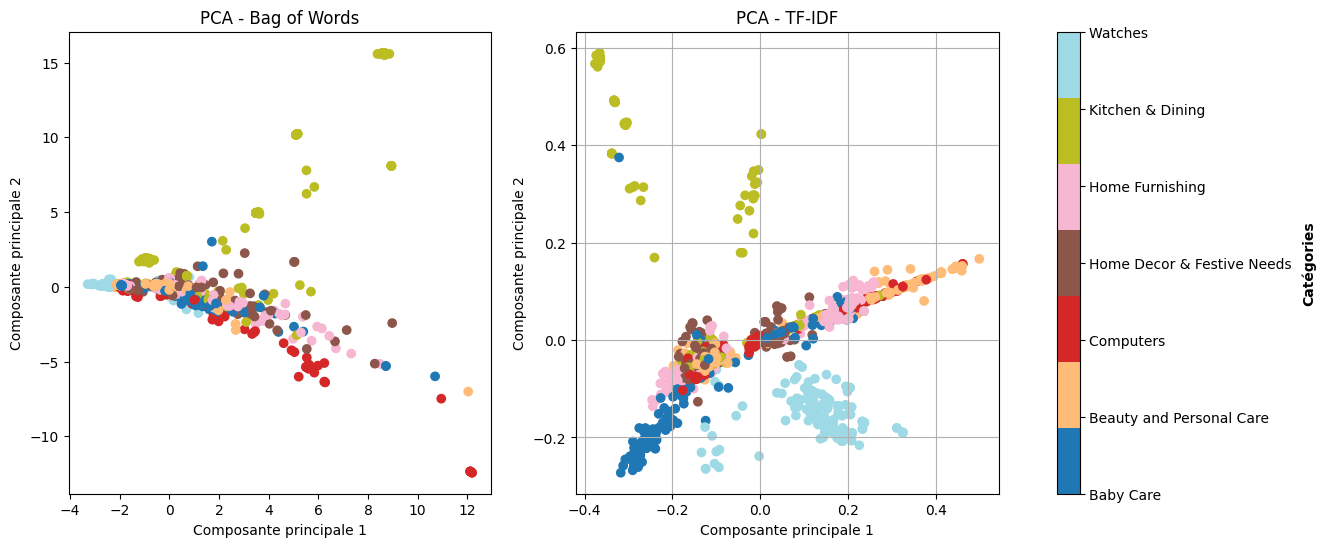

In [58]:
# Encodage des descriptions avec Bag of Words et TF-IDF
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
bow_encoded = bow_vectorizer.fit_transform(data_description['cleaned_description'])
tfidf_encoded = tfidf_vectorizer.fit_transform(data_description['cleaned_description'])

# Application de PCA
pca = PCA(n_components=2)
pca_bow = pca.fit_transform(bow_encoded.toarray())
pca_tfidf = pca.fit_transform(tfidf_encoded.toarray())

# Supposons que 'Catégories' soit une colonne dans new_data contenant les noms des catégories
categories = data["product_category_tree"].apply(lambda x: x.split('>>')[0].strip('["'))  # Assurer que c'est une chaîne de caractères

# Création d'un mappage de couleurs pour chaque catégorie unique
unique_categories = np.unique(categories)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_categories)))  # Génération de couleurs
category_color_map = dict(zip(unique_categories, colors))

# Création du graphique avec subplots pour chaque méthode d'encodage
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Tracé pour Bag of Words
scatter1 = axes[0].scatter(pca_bow[:, 0], pca_bow[:, 1], c=[category_color_map[cat] for cat in categories], label='Bag of Words')
axes[0].set_title('PCA - Bag of Words')
axes[0].set_xlabel('Composante principale 1')
axes[0].set_ylabel('Composante principale 2')

# Tracé pour TF-IDF
scatter2 = axes[1].scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=[category_color_map[cat] for cat in categories], label='TF-IDF')
axes[1].set_title('PCA - TF-IDF')
axes[1].set_xlabel('Composante principale 1')
axes[1].set_ylabel('Composante principale 2')

# Placement de la colorbar à l'extérieur des axes
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=ListedColormap(colors)), ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_ticks(np.linspace(0, 1, len(unique_categories)))
cbar.set_ticklabels(unique_categories)
cbar.set_label('Catégories', fontsize = 10,fontweight = 'bold')
plt.grid(True)
plt.show()

- **Score de Silhouette**: Tf_Ifd et Bag of Words

In [59]:
# Nombre de clusters - peut être ajusté selon le nombre de catégories uniques
n_clusters = len(unique_categories)

# Clustering sur le résultat de PCA pour Bag of Words
kmeans_bow = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(pca_bow)
bow_labels = kmeans_bow.labels_

# Clustering sur le résultat de PCA pour TF-IDF
kmeans_tfidf = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(pca_tfidf)
tfidf_labels = kmeans_tfidf.labels_

# Calcul des ARI
ari_bow = adjusted_rand_score(categories, bow_labels)
ari_tfidf = adjusted_rand_score(categories, tfidf_labels)

print(f"ARI méthode Bag of Words: {ari_bow:.2f}")
print(f"ARI méthode TF-IDF: {ari_tfidf:.2f}")

ARI méthode Bag of Words: 0.05
ARI méthode TF-IDF: 0.21


### **Comparaison**

- **Comparaison 1** : Visuellement on constacte qu'il y'a un nette regroupement des différentes catégories dans la méthode **TF-IDF** par rapport à la méthode **Bag of word**, dans ce cas la méthode TF-IDF est plus pertinente. 

- **Comparaison 2** : Les résultats de l'ARI entre les deux méthode(**TF-IDF: 0.21** et **Bag of Words: 0.05**) montre que les clusters ou catégories sont bien regroupées dans la méthode TF-IDF que dans la méthode Bag of Words.

####

### **Modèles simples**

#### **5.2 Méthode  embedding**

- **Fonction embedding**

In [60]:
df_description = df_description.copy()

# Nettoyage du texte par l'embedding
def clean_text_for_embedding(description):
    description = re.sub(r'[^a-zA-Z\s]', '', description, re.I|re.A).lower().strip()
    tokens = description.split()
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens

df_description['description_embedding'] = df_description['description'].apply(clean_text_for_embedding)
df_description['description_embedding'].head()

0    [key, features, elegance, polyester, multicolo...
1    [specifications, sathiyas, cotton, bath, towel...
2    [key, features, eurospa, cotton, terry, face, ...
3    [key, features, santosh, royal, fashion, cotto...
4    [key, features, jaipur, print, cotton, floral,...
Name: description_embedding, dtype: object

1- Embedding: **word2vec**

In [61]:
# Training the Word2Vec model on the cleaned tokens
word2vec_model = Word2Vec(sentences=df_description['description_embedding'], vector_size=100, window=5, min_count=2, workers=4)

# fonction de conversion des documents en vecteur
def document_vectoriser(word2vec_model, description_embedding):
    # Remove out-of-vocabulary words
    description_embedding = [word for word in description_embedding if word in word2vec_model.wv.key_to_index]
    if not description_embedding:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[description_embedding], axis=0)

# Apply the function to convert each description into a document vector
df_description['description_vectoriser'] = df_description['description_embedding'].apply(lambda x: document_vectoriser(word2vec_model, x))
df_description['description_vectoriser'].head()

0    [0.1704381, 0.09747963, 0.23603597, -0.153894,...
1    [0.3295948, 0.11319996, 0.28686902, -0.2147512...
2    [0.1758688, 0.09922184, 0.25667253, -0.1628575...
3    [0.3342473, 0.13668542, 0.3338389, -0.2439, -0...
4    [0.26760942, 0.12241768, 0.33243817, -0.226460...
Name: description_vectoriser, dtype: object

In [62]:
df_description.head()

,description,description_embedding,description_vectoriser
0,Key Features of Elegance Polyester Multicolor ...,"[key, features, elegance, polyester, multicolo...","[0.1704381, 0.09747963, 0.23603597, -0.153894,..."
1,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel...","[0.3295948, 0.11319996, 0.28686902, -0.2147512..."
2,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, eurospa, cotton, terry, face, ...","[0.1758688, 0.09922184, 0.25667253, -0.1628575..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, santosh, royal, fashion, cotto...","[0.3342473, 0.13668542, 0.3338389, -0.2439, -0..."
4,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, jaipur, print, cotton, floral,...","[0.26760942, 0.12241768, 0.33243817, -0.226460..."


In [63]:
# Réduction de dimension PCA des documents vectorisés
doc_vectors = np.vstack(df_description['description_vectoriser'])
pca_word2vec = PCA(n_components=2)
word2vec_pca_result = pca_word2vec.fit_transform(doc_vectors)
# Création d'un DataFrame 
pca_word2vec_df = pd.DataFrame(word2vec_pca_result, columns=['PC1','PC2'])
pca_word2vec_df.head()

,PC1,PC2
0,-2.050992,0.206378
1,-2.417407,-1.003117
2,-1.952741,-0.221948
3,-2.397606,-0.674826
4,-2.198191,-0.552533


In [64]:
pca_word2vec_df['category'] = data[["product_category_tree"]]
pca_word2vec_df.head()

,PC1,PC2,category
0,-2.050992,0.206378,"[""Home Furnishing >> Curtains & Accessories >>..."
1,-2.417407,-1.003117,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,-1.952741,-0.221948,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,-2.397606,-0.674826,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,-2.198191,-0.552533,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


- **Visualisation**

C:\Users\521169\AppData\Local\Temp\ipykernel_28060\1846368166.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


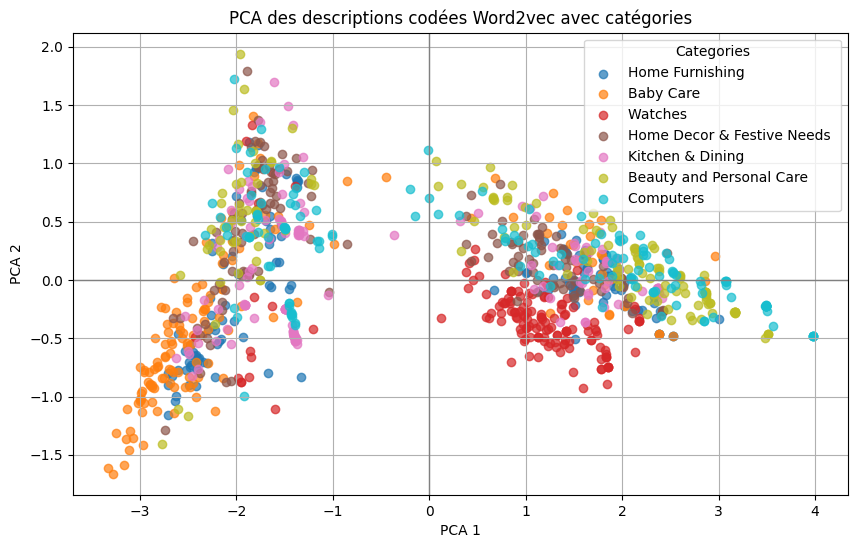

In [65]:
# Analyser la catégorie dans un format simplifié 
pca_word2vec_df['simplified_category'] = pca_word2vec_df['category'].apply(lambda x: x.split('>>')[0].strip('["'))

# Obtenir des catégories uniques
categories = pca_word2vec_df['simplified_category'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))

# tracer les PCA 
plt.figure(figsize=(10, 6))
for i, category in enumerate(categories):
    # filtrage des données par catégories
    category_data = pca_word2vec_df[pca_word2vec_df['simplified_category'] == category]
    plt.scatter(category_data['PC1'], category_data['PC2'], color=colors(i), label=category, alpha=0.7)
    
# Visualisation du graphe
plt.title('PCA des descriptions codées Word2vec avec catégories')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.legend(title='Categories')
plt.show()

- **Score de Silhouette**(word2vec)

In [66]:
# Silhouette Score
labels = pca_word2vec_df['simplified_category'].astype('category').cat.codes  # Convertir les catégories en codes numériques pour la notation
# Calculate du score Silhouette 
score = silhouette_score(pca_word2vec_df[['PC1', 'PC2']], labels)
score

-0.14034142

######

### **Modèles Avancés**

**1- Embeddings BERT**

In [68]:
# Charger le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
import transformers
print(type(tokenizer))
print(transformers.__version__)

# Fonction pour générer les embeddings BERT
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        # Tokenization compatible avec anciennes versions
        inputs = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Ajoute les tokens spéciaux [CLS] et [SEP]
            max_length=512,           # Limite à 512 tokens
            return_tensors="pt"       # Retourne des tenseurs PyTorch
        )
        
        # Gestion manuelle de l'attention_mask si absente
        input_ids = inputs['input_ids']
        attention_mask = torch.tensor([[1] * input_ids.size(1)])  # 1 pour les tokens présents, 0 pour le padding
        
        # Générer les embeddings
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            pooled_output = outputs.pooler_output
            embeddings.append(pooled_output.squeeze().numpy())
    return embeddings

# Appliquer la fonction sur les descriptions
descriptions = df_description['description'].dropna().astype(str).tolist()
df_description['Bert_description'] = get_bert_embeddings(descriptions)

df_description[['description','Bert_description']].head()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<class 'transformers.models.bert.tokenization_bert.BertTokenizer'>
4.47.1


,description,Bert_description
0,Key Features of Elegance Polyester Multicolor ...,"[-0.811307, -0.7939653, -0.9978583, 0.89889467..."
1,Specifications of Sathiyas Cotton Bath Towel (...,"[-0.8292478, -0.66040504, -0.99376214, 0.87963..."
2,Key Features of Eurospa Cotton Terry Face Towe...,"[-0.73921716, -0.66153324, -0.9858485, 0.80539..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[-0.84220123, -0.69723916, -0.9957569, 0.91337..."
4,Key Features of Jaipur Print Cotton Floral Kin...,"[-0.8555258, -0.7585778, -0.99528855, 0.895775..."


- **Réduction de dimension avec PCA**

In [69]:
# Réduction de dimension avec PCA
doc_vectors = np.vstack(df_description['Bert_description'])
pca_bert = PCA(n_components=2)
bert_pca_result = pca_bert.fit_transform(doc_vectors)

# Création d'un DataFrame pour les résultats PCA
pca_bert_df = pd.DataFrame(bert_pca_result, columns=['PC1', 'PC2'])

# Afficher les premières lignes
pca_bert_df.head()

,PC1,PC2
0,-3.061894,1.907913
1,-0.434554,-0.322129
2,1.694179,1.910540
3,-2.223117,0.061639
4,-2.114201,0.577129


In [81]:
pca_bert_df['category'] = data[["product_category_tree"]]
pca_bert_df.head()

,PC1,PC2,category
0,-3.061894,1.907913,"[""Home Furnishing >> Curtains & Accessories >>..."
1,-0.434554,-0.322129,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,1.694179,1.910540,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,-2.223117,0.061639,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,-2.114201,0.577129,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


- **Visualisation graphe Embedding Bert**

C:\Users\521169\AppData\Local\Temp\ipykernel_28060\2944649911.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


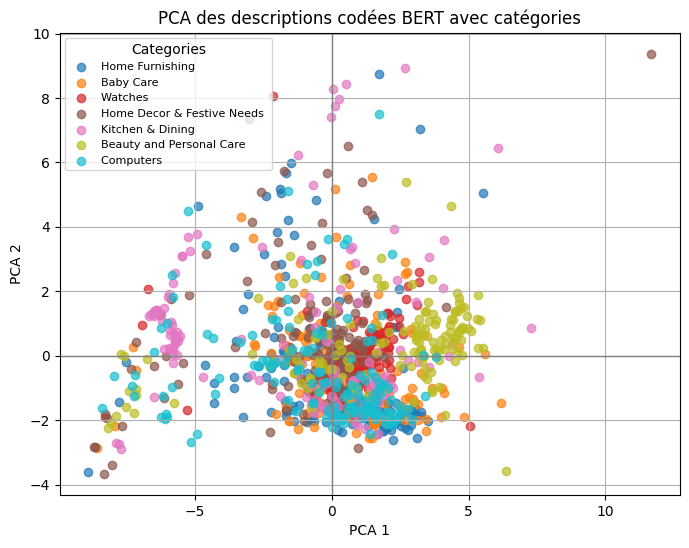

In [91]:
# Analyser la catégorie dans un format simplifié 
pca_bert_df['simplified_category'] = data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip('["'))

# Obtenir des catégories uniques
categories = pca_bert_df['simplified_category'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))

# tracer les PCA 
plt.figure(figsize=(8, 6))
for i, category in enumerate(categories):
    # filtrage des données par catégories
    category_data = pca_bert_df[pca_bert_df['simplified_category'] == category]
    plt.scatter(category_data['PC1'], category_data['PC2'], color=colors(i), label=category, alpha=0.7)
    
# Visualisation du graphe
plt.title('PCA des descriptions codées BERT avec catégories')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.legend(title='Categories', fontsize = 8)
plt.show()

**2- Embedding : Universal Sentence Encoder(USE)**

In [70]:
pip install numpy==1.24.4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install tensorflow tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
    --------------------------------------- 0.3/15.9 MB ? eta -:--:--
    --------------------------------------- 0.3/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.9 MB 578.7 kB/s eta 0:00:27
   - -------------------------------------- 0.5/15.9 MB 578.7 kB/s eta 0:00:27
   - -------------------------------------- 0.8/15.9 MB 610.3 kB/s eta 0:00:25
   - -------------------------------------- 0.8/15.9 MB 610.3 kB/s eta 0:00:25
   -- ------------------------------------- 1.0/15.9 MB 613.9 kB/s eta 0:00:25
   -- ------------------------------------- 1.0/15.9 MB 613.9 kB/s eta 0:00:25
   -- ------------------------------------- 1.0/15.9 MB 613.9 kB/s eta 0:00:25
   --- ------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.0.2 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.0.2 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
statsmodels 0.14.1 requires numpy<2,>=1.18, but you have numpy 2.0.2 which is incompatible.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 2.0.2 which is incompatible.
panel 1.1.0 requires markdown-it-py<3, but you have markdown-

In [72]:
pip install --upgrade backports.tarfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
import tensorflow_hub as hub

In [74]:
# Charger l'Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [75]:
# Générer les embeddings pour les descriptions
def get_embeddings(descriptions):
    return embed(descriptions).numpy()

# Appliquer la fonction sur les descriptions
df_description["Embeddings_USE"] = list(get_embeddings(df_description['description']))
df_description[['description','Embeddings_USE']].head()

,description,Embeddings_USE
0,Key Features of Elegance Polyester Multicolor ...,"[-0.05636991, -0.023048604, 0.017895335, 0.047..."
1,Specifications of Sathiyas Cotton Bath Towel (...,"[-0.051228892, -0.018987244, 0.0122769205, 0.0..."
2,Key Features of Eurospa Cotton Terry Face Towe...,"[-0.05830237, 0.023299133, -0.044487137, 0.054..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[-0.05548354, -0.052557502, 0.042706285, 0.052..."
4,Key Features of Jaipur Print Cotton Floral Kin...,"[-0.055115018, -0.03785485, 0.040429447, 0.049..."


In [88]:
# Réduction de dimension avec PCA
doc_vectors2 = np.vstack(df_description['Embeddings_USE'])
pca_USE = PCA(n_components=2)
USE_pca_result = pca_USE.fit_transform(doc_vectors2)

# Création d'un DataFrame pour les résultats PCA
pca_USE_df = pd.DataFrame(USE_pca_result, columns=['PC1','PC2'])

# Afficher les premières lignes
pca_USE_df.head()

,PC1,PC2
0,0.527512,-0.006302
1,0.443518,-0.104094
2,0.412001,-0.062230
3,0.468586,-0.206292
4,0.443265,-0.196631


- **Visualisation graphe Embedding USE**

C:\Users\521169\AppData\Local\Temp\ipykernel_28060\3796193974.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


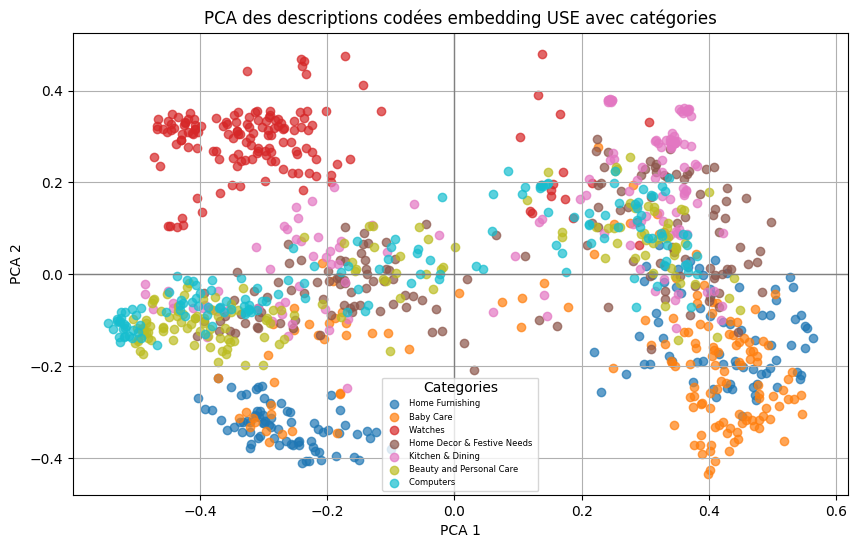

In [94]:
# Analyser la catégorie dans un format simplifié 
pca_USE_df['simplified_category'] = data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip('["'))

# Obtenir des catégories uniques
categories = pca_USE_df['simplified_category'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))

# tracer les PCA 
plt.figure(figsize=(10, 6))
for i, category in enumerate(categories):
    # filtrage des données par catégories
    category_data = pca_USE_df[pca_USE_df['simplified_category'] == category]
    plt.scatter(category_data['PC1'], category_data['PC2'], color=colors(i), label=category, alpha=0.7)
    
# Visualisation du graphe
plt.title('PCA des descriptions codées embedding USE avec catégories')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.legend(title='Categories', fontsize = 6)
plt.show()

- **Visualisation des graphes Embedding Bert et Embedding USE**

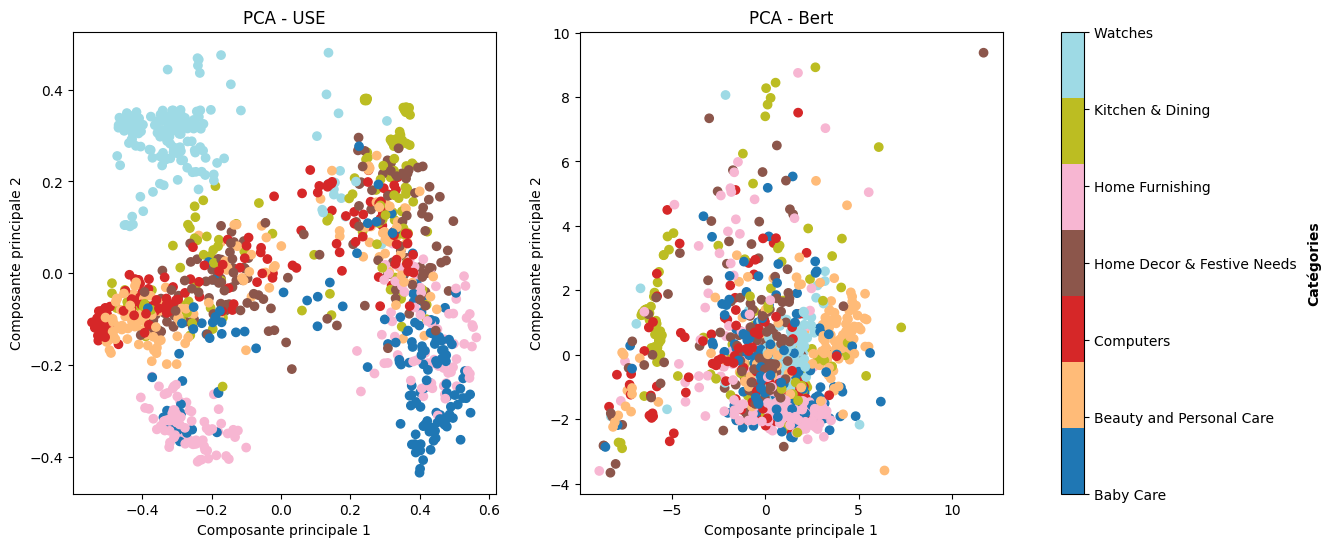

In [77]:
# Graphe Embedding Bert et Embedding USE

# Application de PCA
pca = PCA(n_components=2)
doc_vectors = np.vstack(df_description['Bert_description'])
doc_vectors2 = np.vstack(df_description['Embeddings_USE'])
USE_pca_result = pca.fit_transform(doc_vectors2)
bert_pca_result = pca.fit_transform(doc_vectors)

# Supposons que 'Catégories' soit une colonne dans new_data contenant les noms des catégories
categories = data["product_category_tree"].apply(lambda x: x.split('>>')[0].strip('["'))  # Assurer que c'est une chaîne de caractères

# Création d'un mappage de couleurs pour chaque catégorie unique
unique_categories = np.unique(categories)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_categories)))  # Génération de couleurs
category_color_map = dict(zip(unique_categories, colors))

# Création du graphique avec subplots pour chaque méthode d'encodage
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Tracé pour USE
scatter1 = axes[0].scatter(USE_pca_result[:, 0], USE_pca_result[:, 1], c=[category_color_map[cat] for cat in categories], label='USE')
axes[0].set_title('PCA - USE')
axes[0].set_xlabel('Composante principale 1')
axes[0].set_ylabel('Composante principale 2')

# Tracé pour Bert
scatter2 = axes[1].scatter(bert_pca_result[:, 0], bert_pca_result[:, 1], c=[category_color_map[cat] for cat in categories], label='BERT')
axes[1].set_title('PCA - Bert')
axes[1].set_xlabel('Composante principale 1')
axes[1].set_ylabel('Composante principale 2')

# Placement de la colorbar à l'extérieur des axes
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=ListedColormap(colors)), ax=axes.ravel().tolist(), orientation='vertical')
cbar.set_ticks(np.linspace(0, 1, len(unique_categories)))
cbar.set_ticklabels(unique_categories)
cbar.set_label('Catégories', fontsize = 10,fontweight = 'bold')
plt.show()

### Analyse comparative: les graphes de projection ACP ci-dessus nous montre une plus meillleurs séparation entre les catégories  dans le graphe embedding USE  par rapport à embedding Bert.

- **Score de silhouette: Bert & USE**

In [78]:
# Nombre de clusters - peut être ajusté selon le nombre de catégories uniques
n_clusters = len(unique_categories)

# Clustering sur le résultat de PCA pour Bag of Words
kmeans_use = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(USE_pca_result)
use_labels = kmeans_use.labels_

# Clustering sur le résultat de PCA pour TF-IDF
kmeans_bert = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(bert_pca_result)
bert_labels = kmeans_bert.labels_

# Calcul des ARI
ari_use = adjusted_rand_score(categories, use_labels)
ari_bert = adjusted_rand_score(categories, bert_labels)

print(f"ARI méthode USE: {ari_use:.2f}")
print(f"ARI méthode Bert: {ari_bert:.2f}")

ARI méthode USE: 0.27
ARI méthode Bert: 0.12


### EN CONCLUSION:  On constate d'après les différents graphe et ARI que la méthode embedding USE effectue une meilleur séparation des classes par rapport à la méthode embedding bert